In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split   #train-test bölmesi
from sklearn.neighbors import KNeighborsClassifier   #knn sınıflandırması


In [2]:
odata = pd.read_csv("diabetes.csv")
data = pd.DataFrame(odata)
# print(data.head)
#ourcome 1   hasta     0 sağlıklı

hastalar = data[data.Outcome ==1]
sagliklilar = data[data.Outcome ==0] 

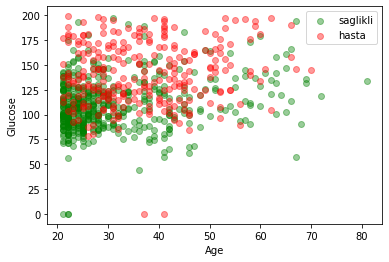

In [3]:

#sadece gluloz degerine bakarak cizim yapma
plt.scatter(sagliklilar.Age,sagliklilar.Glucose,color = "green",label ="saglikli",alpha=0.4)
plt.scatter(hastalar.Age,hastalar.Glucose,color = "red",label ="hasta",alpha = 0.4)
#ilk verdigim x ekseni 2. y ekseni
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()


In [4]:
### x ve y eksenlerini belirleyelim

y = data.Outcome.values
x_ham_veri = data.drop(["Outcome"],axis = 1) 
# outcome değerini ayırdık  çünkü knn bunun dışındakiler icin degerlendirme yapacak


In [5]:
#NORMALIZATION YAP  (degerleri 0 ile 1 arasına getirme )
x = (x_ham_veri - np.min(x_ham_veri))/(np.max(x_ham_veri)-np.min(x_ham_veri))
# before narm
print("önce")
print(x_ham_veri.head())
print("sonra")
print(x.head) #bunu vercez modele

#bunu yapmamızın amacı 0 ile 1 arasında ağırlık eşit olacak şekilde gruplandırmak mesela  72 değeri 0.59 çıkıyor çünkü  x-min / max-min yaptığında %59. gibi düşün


önce
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
sonra
<bound method NDFrame.head of      Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243

c:\users\ulaş\appdata\local\programs\python\python39\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\users\ulaş\appdata\local\programs\python\python39\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [6]:

### TRAIN TEST BOLMESI

# train eğitecek    test başarı hesaplıcak
# eğiteceğim x ve y değerleri                                                        #test size demek % 20 sini test için kullan demek
x_train, x_test , y_train,  y_test = train_test_split(x,y,test_size=0.1,random_state=1)


In [7]:
#knn modeli

knn = KNeighborsClassifier(n_neighbors=3) #knn ye göre 3 tane komsuya bakssın demek
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("k = 3 için başarı sonucumuz = ", knn.score(x_test,y_test))

#en iyi k degerini vermek lazım

k = 3 için başarı sonucumuz =  0.8311688311688312


In [8]:
sayac = 1
for k in range(1,11):
    knn_yeni = KNeighborsClassifier(n_neighbors=k)
    knn_yeni.fit(x_train,y_train)
    print ( sayac , " ","dogruluk oranı= % ",knn_yeni.score(x_test,y_test)*100)
    sayac +=1

#en yuksek oranı   k = 7 icin verdi

1   dogruluk oranı= %  71.42857142857143
2   dogruluk oranı= %  71.42857142857143
3   dogruluk oranı= %  83.11688311688312
4   dogruluk oranı= %  80.51948051948052
5   dogruluk oranı= %  81.81818181818183
6   dogruluk oranı= %  83.11688311688312
7   dogruluk oranı= %  80.51948051948052
8   dogruluk oranı= %  80.51948051948052
9   dogruluk oranı= %  79.22077922077922
10   dogruluk oranı= %  79.22077922077922


In [9]:
# YENİ GELEN VERİYİ TAHMIN ETMEK
# Yeni bir hasta tahmini için:
from sklearn.preprocessing import MinMaxScaler

# normalization yapıyoruz - daha hızlı normalization yapabilmek için MinMax  scaler kullandık...
sc = MinMaxScaler()
sc.fit_transform(x_ham_veri)

new_prediction = list(map(int,input("degerler").split()))
new_prediction[0]


degerler1,2,3,4,5


ValueError: invalid literal for int() with base 10: '1,2,3,4,5'